In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
enrollment_data = pd.read_excel('/content/drive/MyDrive/초등학교_입학자_데이터_2008+2023.xlsx')

In [4]:
enrollment_data.head(10)

,자치구,학교명,학교급,설립,상태,개교일,우편번호,주소,교지면적,입학자_계_2008,...,입학자_계_2014,입학자_계_2015,입학자_계_2016,입학자_계_2017,입학자_계_2018,입학자_계_2019,입학자_계_2020,입학자_계_2021,입학자_계_2022,입학자_계_2023
0,강남구,서울언북초등학교,초등학교,공립,기존(원)교,19450401.0,6066.0,서울특별시 강남구 삼성로135길 42(청담동.언북초등학교),17424.0,214.0,...,331.0,318.0,257.0,328.0,309.0,341.0,306.0,283.0,262.0,215.0
1,강남구,서울대도초등학교,초등학교,공립,기존(원)교,19800327.0,6277.0,서울특별시 강남구 선릉로 209(도곡동. 서울대도초등학교),15531.0,246.0,...,271.0,300.0,251.0,274.0,277.0,332.0,299.0,260.0,223.0,241.0
2,강남구,서울도성초등학교,초등학교,공립,기존(원)교,19810930.0,6213.0,서울특별시 강남구 역삼로 313(역삼동.도성초등학교),14912.0,155.0,...,250.0,241.0,212.0,255.0,242.0,261.0,250.0,260.0,203.0,212.0
3,강남구,서울언주초등학교,초등학교,공립,기존(원)교,19271008.0,6268.0,서울특별시 강남구 남부순환로363길 19(도곡동.언주초등학교),12881.0,201.0,...,218.0,229.0,223.0,267.0,280.0,245.0,265.0,232.0,215.0,198.0
4,강남구,서울일원초등학교,초등학교,공립,기존(원)교,19841010.0,6345.0,서울특별시 강남구 영동대로4길 20(일원동.일원초등학교),13853.0,160.0,...,169.0,160.0,94.0,53.0,53.0,79.0,81.0,76.0,195.0,189.0
5,강남구,서울대왕초등학교,초등학교,공립,기존(원)교,19330301.0,6365.0,서울특별시 강남구 헌릉로618길 8(세곡동.대왕초등학교),11006.0,79.0,...,166.0,163.0,171.0,206.0,156.0,118.0,100.0,97.0,84.0,90.0
6,강남구,서울세명초등학교,초등학교,공립,기존(원)교,20120901.0,6375.0,서울특별시 강남구 자곡로 55. 서울세명초등학교 (세곡동),11814.0,NaN,...,162.0,155.0,183.0,215.0,225.0,247.0,184.0,134.0,121.0,100.0
7,강남구,서울압구정초등학교,초등학교,공립,기존(원)교,19770504.0,6004.0,서울특별시 강남구 압구정로39길 29(압구정동.압구정초등학교),14136.0,182.0,...,160.0,166.0,180.0,178.0,190.0,200.0,130.0,143.0,145.0,128.0
8,강남구,서울대모초등학교,초등학교,공립,기존(원)교,19941014.0,6363.0,서울특별시 강남구 광평로20길 27. 대모초등학교 (일원동.대모초등학교),9972.0,136.0,...,158.0,174.0,155.0,176.0,156.0,144.0,135.0,135.0,122.0,111.0
9,강남구,서울개일초등학교,초등학교,공립,기존(원)교,19870901.0,6323.0,서울특별시 강남구 개포로 401. 개일초등학교 (개포동.개일초등학교),13871.0,122.0,...,154.0,111.0,94.0,125.0,114.0,130.0,150.0,145.0,183.0,185.0


In [5]:
birth_data = pd.read_excel('/content/drive/MyDrive/출산순위별+출생_2001+2022.xlsx')

In [6]:
birth_data.head()

,자치구,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,종로구,1683,1453,1404,1296,1143,1139,1204,1176,1095,...,873,905,906,846,689,644,673,529,528,464
1,중구,1577,1409,1203,1260,1096,1122,1276,1141,1052,...,1022,1041,950,959,808,733,783,690,627,587
2,용산구,2749,2268,2226,2261,2041,2161,2449,2332,2159,...,2129,1976,1967,1708,1464,1377,1314,1176,1234,1110
3,성동구,4306,3917,3864,3685,3368,3459,3762,3372,2823,...,2838,2654,2753,2531,2462,2346,2191,1945,1833,1690
4,광진구,4780,4201,4239,3908,3397,3566,3714,3479,3258,...,2990,3011,2951,2767,2347,2197,1957,1532,1484,1278


In [7]:
# 출생 데이터와 입학자 수 데이터 매핑
correlation_data = []
for year in range(2008, 2024):
    birth_year = year - 7
    for district in birth_data['자치구'].unique():
        birth_count = birth_data.loc[birth_data['자치구'] == district, str(birth_year)].values[0]
        enrollment_count = enrollment_data.loc[enrollment_data['자치구'] == district, f'입학자_계_{year}'].sum()
        correlation_data.append({'연도': year, '자치구': district, '출생자수': birth_count, '입학자수': enrollment_count})

correlation_df = pd.DataFrame(correlation_data)

In [8]:
correlation_df.head(16)

,연도,자치구,출생자수,입학자수
0,2008,종로구,1683,1205.0
1,2008,중구,1577,1069.0
2,2008,용산구,2749,1739.0
3,2008,성동구,4306,2966.0
4,2008,광진구,4780,3113.0
5,2008,동대문구,3891,2813.0
6,2008,중랑구,4599,3521.0
7,2008,성북구,4609,4388.0
8,2008,강북구,3442,2485.0
9,2008,도봉구,4033,3740.0


In [9]:
# 선형 회귀 모델
X = correlation_df[['출생자수']]
y = correlation_df['입학자수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
# 회귀식 도출
coef = model.coef_[0]
intercept = model.intercept_

# 회귀식 출력
print(f"회귀식: 입학자수 = {coef} * 출생자수 + {intercept}")


회귀식: 입학자수 = 0.8272871498640489 * 출생자수 + -327.34890908778334


종로구 회귀식: 입학자수 = 0.6571656898237263 * 출생자수 + 104.42846753800836
중구 회귀식: 입학자수 = 0.8173257064967495 * 출생자수 + -269.9205424597443
용산구 회귀식: 입학자수 = 0.7373239260337356 * 출생자수 + -345.57883357590504
성동구 회귀식: 입학자수 = 0.7227719445502643 * 출생자수 + -311.0807548292619
광진구 회귀식: 입학자수 = 0.6161149404518323 * 출생자수 + 102.81722884459123
동대문구 회귀식: 입학자수 = 0.7491483246057399 * 출생자수 + -197.62283912944486
중랑구 회귀식: 입학자수 = 0.995476442817227 * 출생자수 + -1025.7509361852458
성북구 회귀식: 입학자수 = 0.8912634501818526 * 출생자수 + -373.01677746981795
강북구 회귀식: 입학자수 = 0.939018523675711 * 출생자수 + -907.9750641563533
도봉구 회귀식: 입학자수 = 1.1450556153720517 * 출생자수 + -971.7972692733774
노원구 회귀식: 입학자수 = 0.8428228498063366 * 출생자수 + -544.7523208322436
은평구 회귀식: 입학자수 = 0.6227893256131999 * 출생자수 + 775.1632170993857
서대문구 회귀식: 입학자수 = 0.3391559600031891 * 출생자수 + 947.0890421878885
마포구 회귀식: 입학자수 = 0.8710480742831803 * 출생자수 + -754.1878145877195
양천구 회귀식: 입학자수 = 0.9568782512193439 * 출생자수 + 68.32531908473675
강서구 회귀식: 입학자수 = 0.5381502187519843 * 출생자수 + 1610.793001

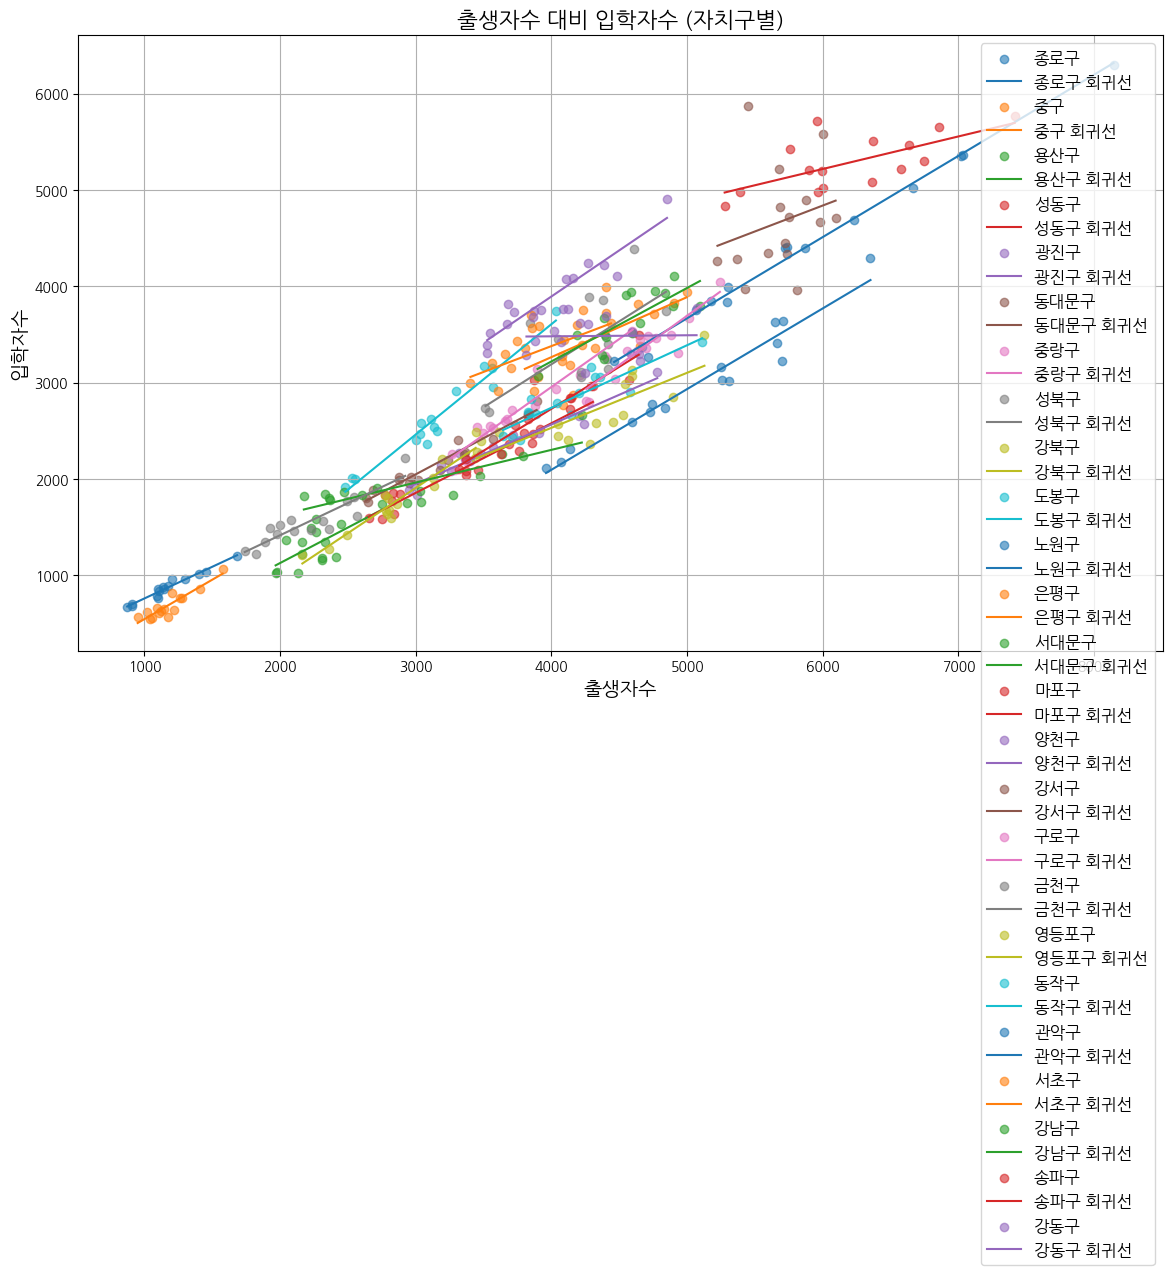

In [44]:
# 자치구별 회귀식 도출
districts = correlation_df['자치구'].unique()
district_regressions = {}

for district in districts:
    district_data = correlation_df[correlation_df['자치구'] == district]
    X = district_data[['출생자수']]
    y = district_data['입학자수']

    model = LinearRegression()
    model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_[0]

    district_regressions[district] = (intercept, coef)
    print(f"{district} 회귀식: 입학자수 = {coef} * 출생자수 + {intercept}")

# 결과를 시각화
plt.figure(figsize=(14, 8))

for district in districts:
    district_data = correlation_df[correlation_df['자치구'] == district]
    plt.scatter(district_data['출생자수'], district_data['입학자수'], label=district, alpha=0.6)

    # 회귀선 그리기
    X_line = np.linspace(district_data['출생자수'].min(), district_data['출생자수'].max(), 100)
    intercept, coef = district_regressions[district]
    Y_line = coef * X_line + intercept
    plt.plot(X_line, Y_line, label=f'{district} 회귀선')

plt.title('출생자수 대비 입학자수 (자치구별)', fontsize=16)
plt.xlabel('출생자수', fontsize=14)
plt.ylabel('입학자수', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

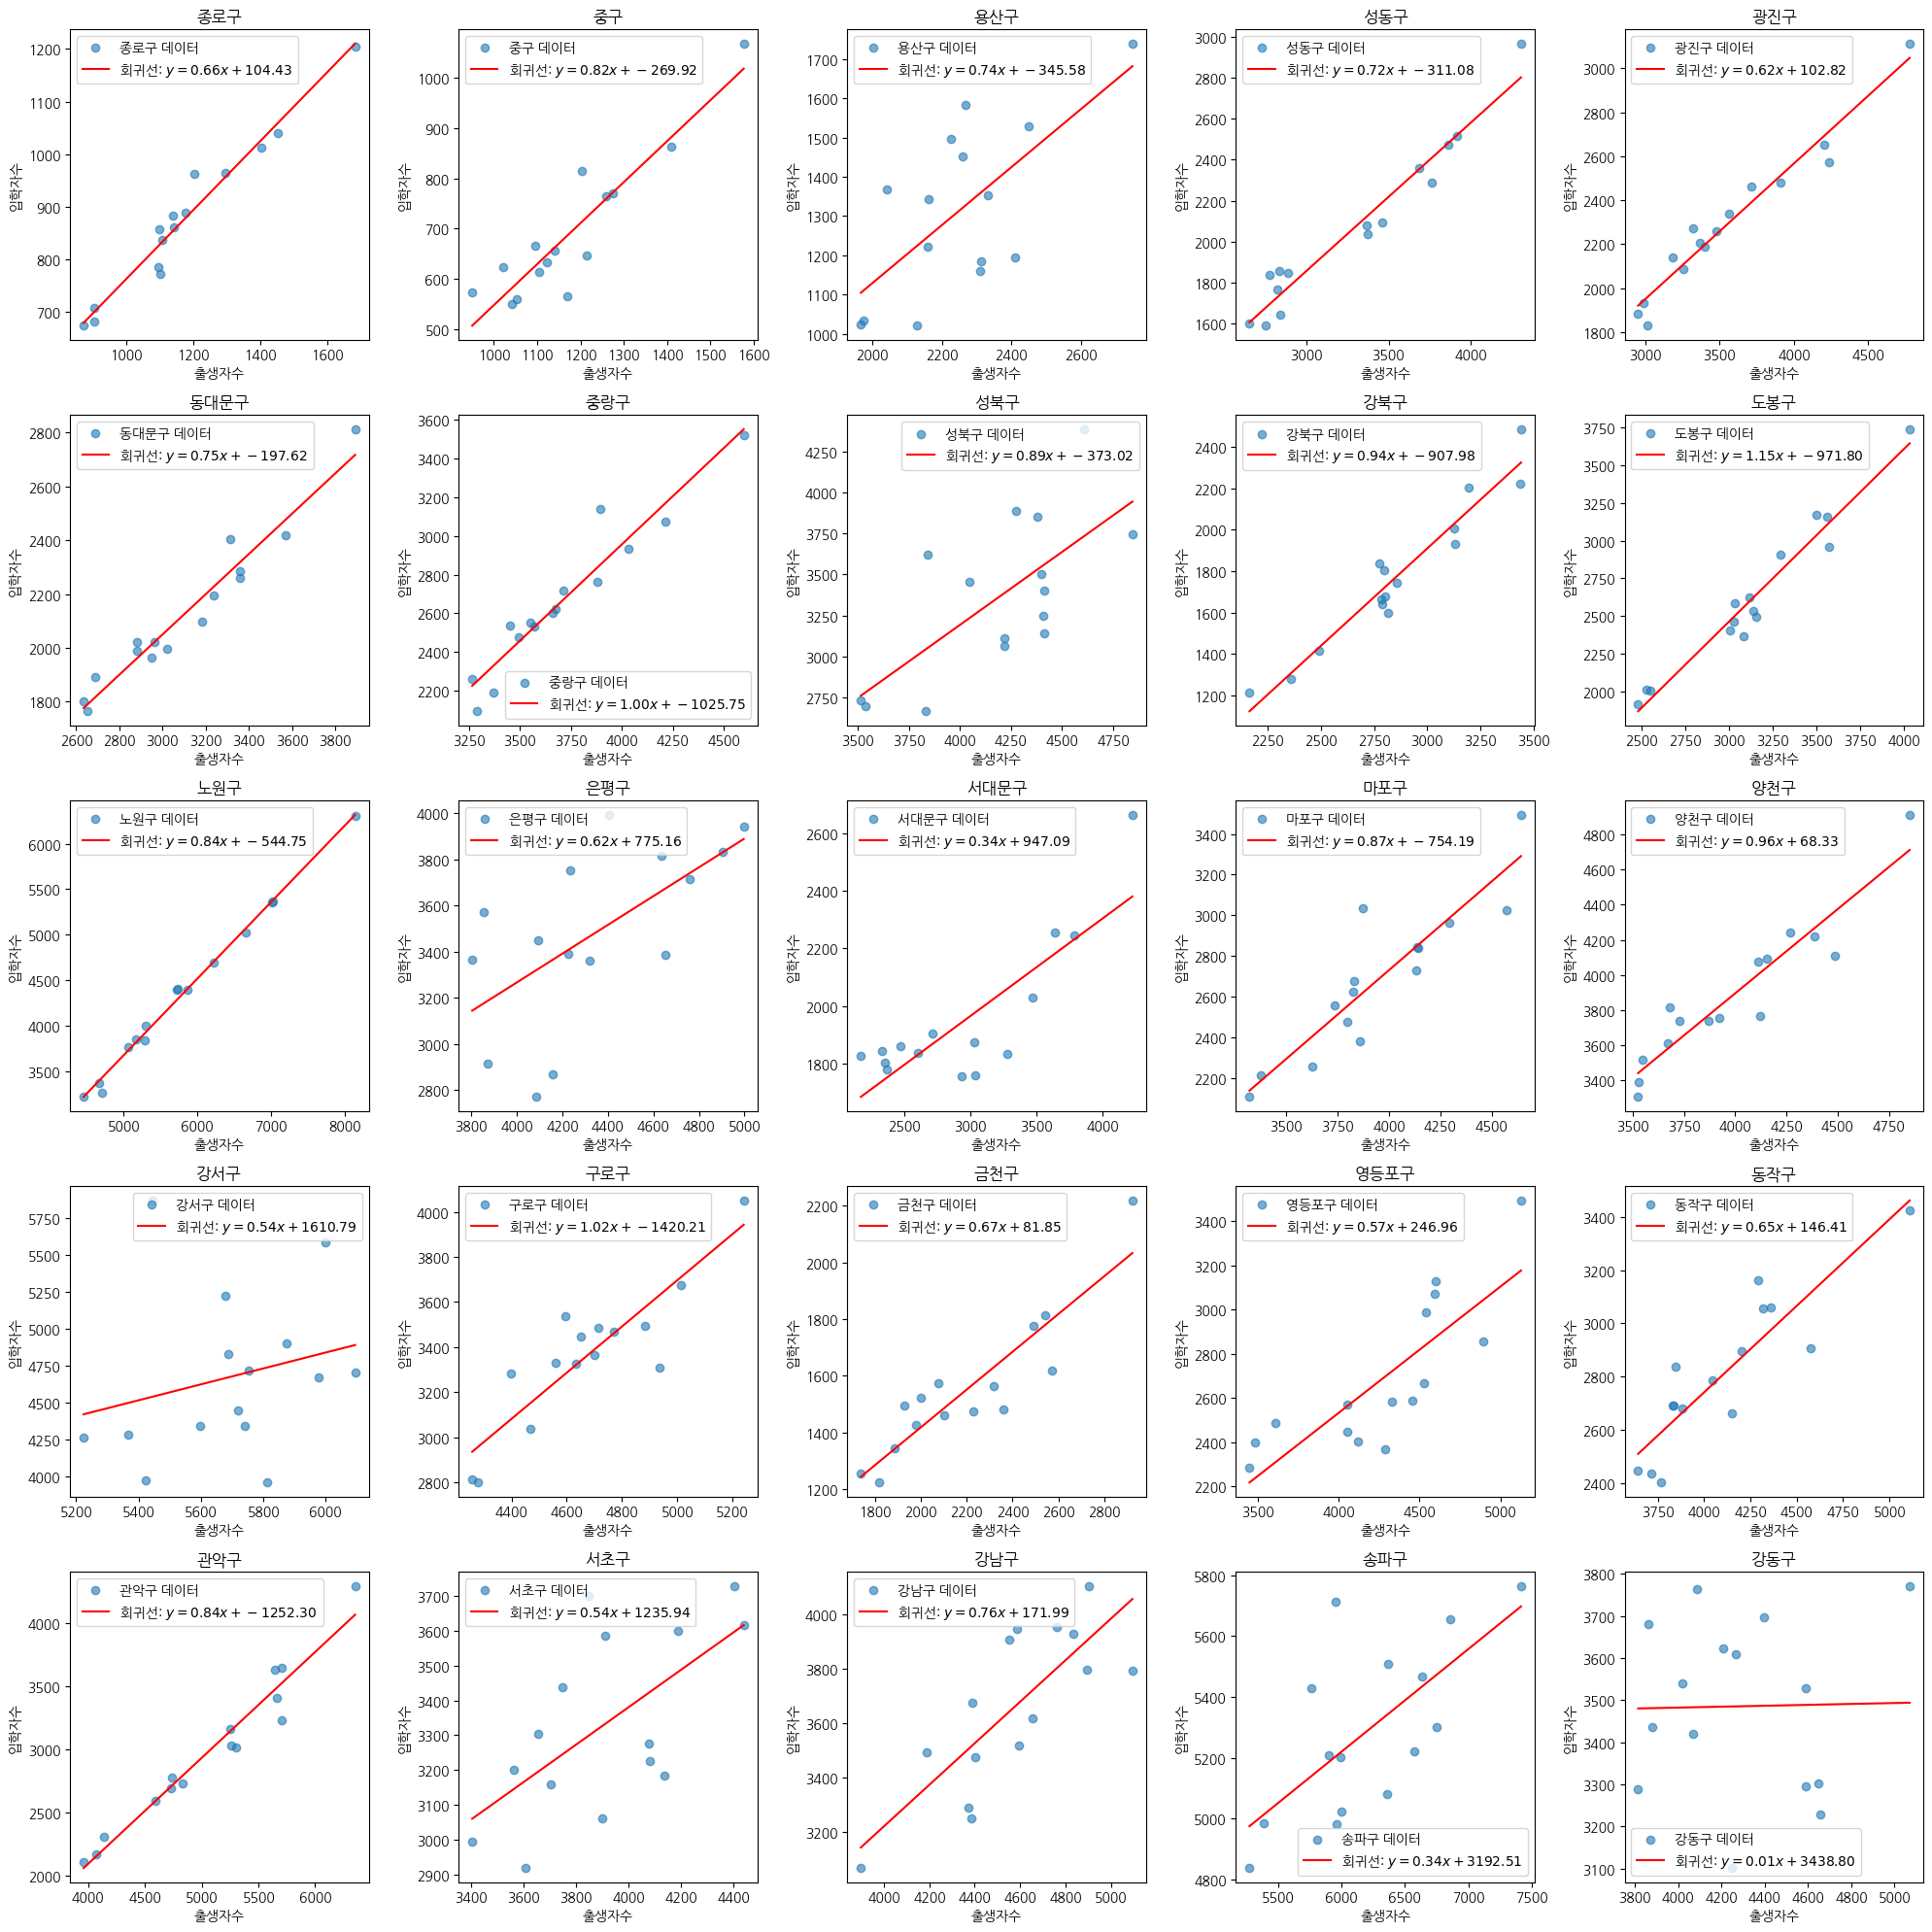

In [45]:
# 자치구 리스트
districts = correlation_df['자치구'].unique()

# 그래프 생성
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))  # 5x5의 서브플롯, 자치구가 25개라고 가정
axes = axes.flatten()  # 1차원 배열로 변환

for idx, district in enumerate(districts):
    # 자치구별 데이터 추출
    district_data = correlation_df[correlation_df['자치구'] == district]

    # 선형 회귀 모델 적합
    X = district_data[['출생자수']]
    y = district_data['입학자수']
    model = LinearRegression()
    model.fit(X, y)

    # 데이터 포인트 플롯
    axes[idx].scatter(X, y, label=f'{district} 데이터', alpha=0.6)

    # 회귀선 계산 및 플롯
    X_line = pd.DataFrame({'출생자수': [district_data['출생자수'].min(), district_data['출생자수'].max()]})
    Y_line = model.predict(X_line)
    axes[idx].plot(X_line, Y_line, 'r-', label=f'회귀선: $y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}$')

    # 그래프 설정
    axes[idx].set_title(f'{district}')
    axes[idx].set_xlabel('출생자수')
    axes[idx].set_ylabel('입학자수')
    axes[idx].legend()

# 빈 서브플롯 숨기기
for i in range(len(districts), 25):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [10]:
# 미래 예측
prediction_years = [str(year) for year in range(2018, 2023)]
birth_counts = birth_data[prediction_years].sum()
future_enrollments = model.predict(birth_counts.values.reshape(-1, 1))

# 결과 출력
future_predictions = pd.DataFrame({
    '연도': range(2025, 2030),
    '출생자수': birth_counts.values,
    '예상 입학자수': future_enrollments
})

print("모델 성능:", mse, r2)
print("미래 입학자 수 예측:")
print(future_predictions)

모델 성능: 174230.37037709248 0.8698012417037058
미래 입학자 수 예측:
     연도   출생자수       예상 입학자수
0  2025  58074  47127.849881
1  2026  53673  43534.234191
2  2027  47445  38448.790311
3  2028  45531  36885.922684
4  2029  42602  34494.261617


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Failed to fetch https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu/dists/jammy/InRelease  Could not connect to ppa.launchpadcontent.net:443 (185.125.190.80), connection timed out
W: Failed to fetch https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu/dists/jammy/InRelease  Unable to connect to ppa.launchpadcontent.net:443:
W: Failed to fetch https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu/dists/jammy/InRelease  Unable to connect to ppa.launchpadcontent.net:443:
W: Failed to fetch https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/dists/jammy/InRelease  Unable to connect to ppa.launchpadcontent.net:443:
W: Some index files failed to download. They have been ignored, or old ones used instead.


In [35]:
# 미래 예측 데이터
future_predictions = pd.DataFrame({
    '연도': [2025, 2026, 2027, 2028, 2029],
    '출생자수': [58074, 53673, 47445, 45531, 42602],
    '예상 입학자수': [47127.849881, 43534.234191, 38448.790311, 36885.922684, 34494.261617]
})

# 과거 데이터 및 예측 데이터 통합
all_data = pd.concat([correlation_df, future_predictions])

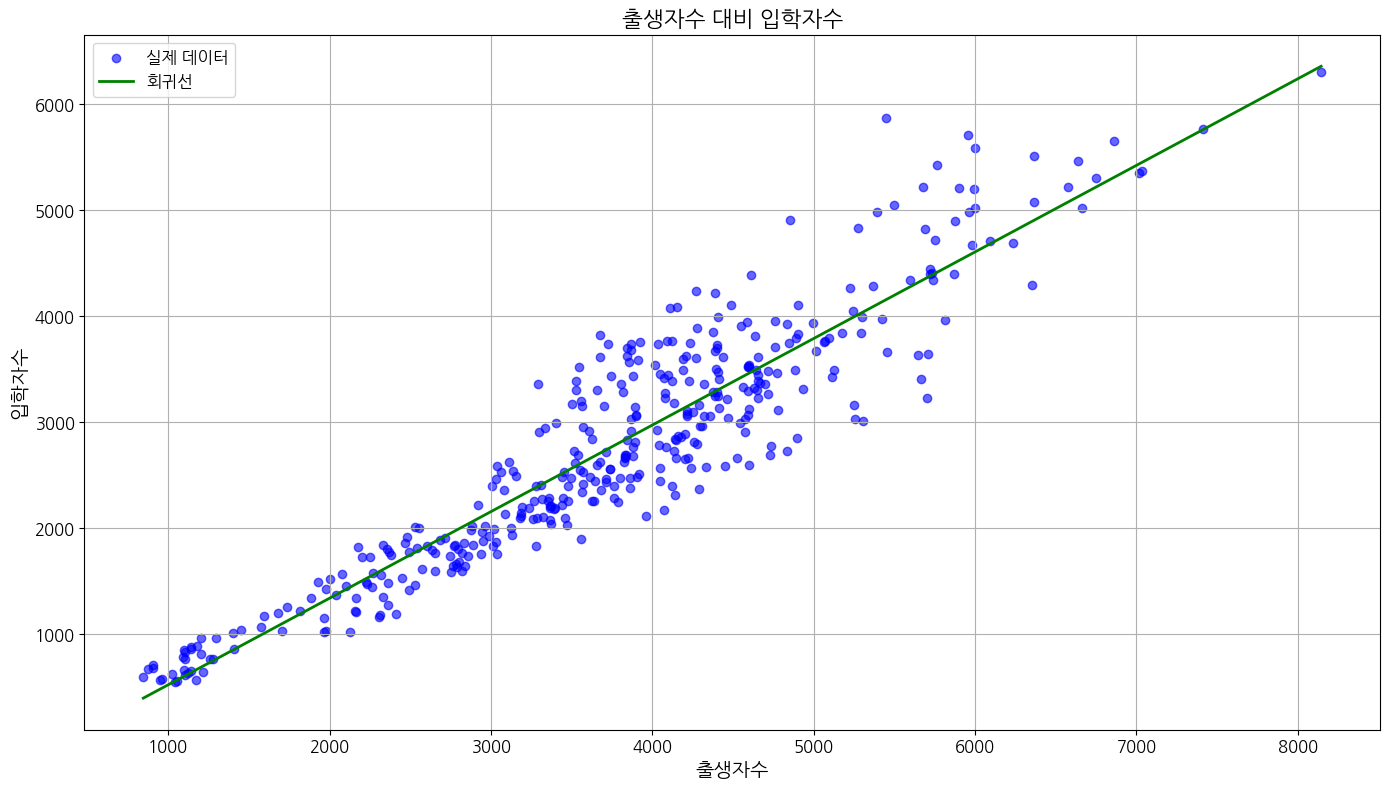

In [30]:
plt.figure(figsize=(14, 8))  # 그래프 크기 설정

# 실제 데이터 포인트
plt.scatter(correlation_df['출생자수'], correlation_df['입학자수'], color='blue', label='실제 데이터', alpha=0.6)

# 모델에 의해 예측된 선형 회귀선 그리기
X_line = np.linspace(correlation_df['출생자수'].min(), correlation_df['출생자수'].max(), 100)
Y_line = model.coef_[0] * X_line + model.intercept_
plt.plot(X_line, Y_line, color='green', label='회귀선', linewidth=2)

plt.title('출생자수 대비 입학자수', fontsize=16)
plt.xlabel('출생자수', fontsize=14)
plt.ylabel('입학자수', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# 시각적 개선을 위한 스타일링 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()